## DecissionTree Classification and Visualization on **_`Boston Housing`_** data
![grape](https://user-images.githubusercontent.com/12748752/126882595-d1f5449e-14bb-4ab3-809c-292caf0858a1.png)
* [Original Link](https://mljar.com/blog/visualize-decision-tree/)
* Below, all 4 methods for **_`DecisionTreeRegressor`_** from `scikit-learn` package (in python)



#### Import Packages
![plum](https://user-images.githubusercontent.com/12748752/126882596-b9ba4645-7001-435e-9a3c-d4416a2543c1.png)

In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#### We are using **_`Boston Housing`_** data from sklearn library
![plum](https://user-images.githubusercontent.com/12748752/126882596-b9ba4645-7001-435e-9a3c-d4416a2543c1.png)

* Prepare the data in **X** and **y**

In [2]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

#### Fit the Regressor set **`max_depth = 3`** in order to keep the tree small
![plum](https://user-images.githubusercontent.com/12748752/126882596-b9ba4645-7001-435e-9a3c-d4416a2543c1.png)


In [3]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

#### Print Text Representation
![plum](https://user-images.githubusercontent.com/12748752/126882596-b9ba4645-7001-435e-9a3c-d4416a2543c1.png)

* Exporting Decision Tree to the text representation can be useful when working on applications whitout user interface or when we want to log information about the model into the text file. 
* ***`sklearn.tree.export_text`***

In [4]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- value: [45.58]
|   |   |--- feature_7 >  1.38
|   |   |   |--- value: [22.91]
|   |--- feature_12 >  14.40
|   |   |--- feature_0 <= 6.99
|   |   |   |--- value: [17.14]
|   |   |--- feature_0 >  6.99
|   |   |   |--- value: [11.98]
|--- feature_5 >  6.94
|   |--- feature_5 <= 7.44
|   |   |--- feature_4 <= 0.66
|   |   |   |--- value: [33.35]
|   |   |--- feature_4 >  0.66
|   |   |   |--- value: [14.40]
|   |--- feature_5 >  7.44
|   |   |--- feature_10 <= 19.65
|   |   |   |--- value: [45.90]
|   |   |--- feature_10 >  19.65
|   |   |   |--- value: [21.90]



### Plot Decision  Tree with  ***`sklearn.tree.plot_tree`***
![grape](https://user-images.githubusercontent.com/12748752/126882595-d1f5449e-14bb-4ab3-809c-292caf0858a1.png)
* It requires **_`matplotlib`_** to be installed. 
* It allows us to easily produce figure of the tree (without intermediate exporting to _**`graphviz`**_).
* The  ***`plot_tree`*** returns annotations for the plot, to not show them in the notebook I assigned returned value to '_'.



#### Like this
```
[Text(167.4, 190.26, 'RM <= 6.941\nmse = 84.42\nsamples = 506\nvalue = 22.533'),
 Text(83.7, 135.9, 'LSTAT <= 14.4\nmse = 40.273\nsamples = 430\nvalue = 19.934'),
 Text(41.85, 81.53999999999999, 'DIS <= 1.385\nmse = 26.009\nsamples = 255\nvalue = 23.35'),
 ......................................................................................
 Text(292.95, 81.53999999999999, 'PTRATIO <= 19.65\nmse = 36.628\nsamples = 30\nvalue = 45.097'),
 Text(272.02500000000003, 27.180000000000007, 'mse = 18.697\nsamples = 29\nvalue = 45.897'),
 Text(313.875, 27.180000000000007, 'mse = -0.0\nsamples = 1\nvalue = 21.9')]
```


> #### Note
* I’m using _**`filled = True`**_ in the plot_tree.
* When this parameter is set to _**True**_ the method uses color to indicate the majority of the class. (It will be nice if there will be some legend with class and color matching.)

> #### Please notice, that the color of the leaf is coresponding to the predicted value.

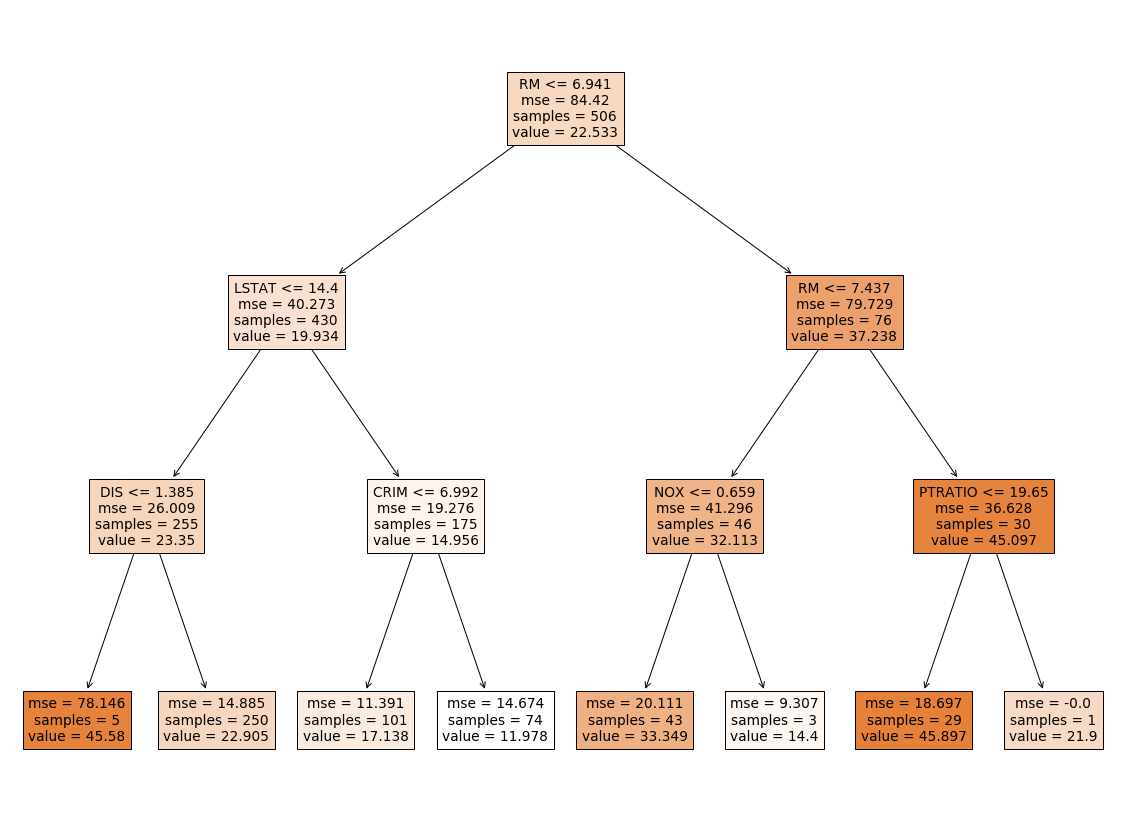

In [5]:
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(regr, feature_names=boston.feature_names, filled=True)

#### To save the figure to the .png file
![plum](https://user-images.githubusercontent.com/12748752/126882596-b9ba4645-7001-435e-9a3c-d4416a2543c1.png)


In [6]:
fig.savefig("decistion_tree.png")

### Plot Decision Tree with **_`graphviz`_** Package
![grape](https://user-images.githubusercontent.com/12748752/126882595-d1f5449e-14bb-4ab3-809c-292caf0858a1.png)
* Please make sure that you have **_`graphviz`_** installed (_**`pip install graphviz`**_).
* To plot the tree first we need to export it to `DOT` format with ***`sklearn.tree.export_graphviz`*** method (link to [docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html)). 
* Then we can plot it in the notebook or save to the file.

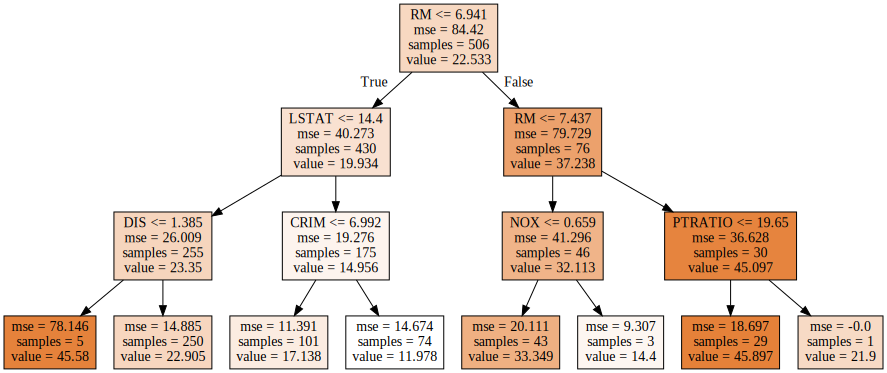

In [7]:
import graphviz

# DOT data
dot_data = tree.export_graphviz(regr, out_file=None, 
                                feature_names=boston.feature_names,  
                                filled=True)
# Draw graph
graph=graphviz.Source(dot_data, format="png") 
graph

#### To save the figure to the .png file
![plum](https://user-images.githubusercontent.com/12748752/126882596-b9ba4645-7001-435e-9a3c-d4416a2543c1.png)

In [8]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

### Plot Decision Tree with **_`dtreeviz`_** Package
![grape](https://user-images.githubusercontent.com/12748752/126882595-d1f5449e-14bb-4ab3-809c-292caf0858a1.png)

* It can be installed with _`pip install dtreeviz`_. 
* It requires **_`graphviz`_** to be installed (but you dont need to manually convert between DOT files and images).

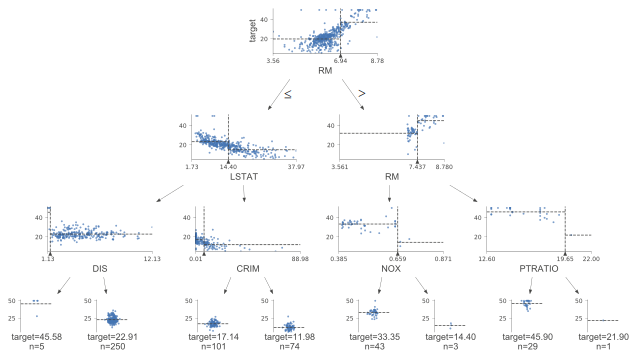

In [9]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(regr, X, y,
                target_name="target",
                feature_names=boston.feature_names)
viz

#### To save the figure to the .svg file
![plum](https://user-images.githubusercontent.com/12748752/126882596-b9ba4645-7001-435e-9a3c-d4416a2543c1.png)

In [10]:
viz.save("decision_tree.svg")

### More links
![grape](https://user-images.githubusercontent.com/12748752/126882595-d1f5449e-14bb-4ab3-809c-292caf0858a1.png)

* [More output types on  **_`dtreeviz`_** Package](https://colab.research.google.com/github/parrt/dtreeviz/blob/master/notebooks/examples.ipynb)